CS4375 HW9

Ramesh Kanakala

This is a Python notebook with the purpose of running classification algorithms on a hotel bookings data set to compare it's performance with R classification.

#### Initial Data Exploration and Cleaning

Check out the Kaggle link for more information on the data set and its variables: https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [13]:
import pandas as pd
#load data
df = pd.read_csv('hotel_bookings.csv', header=0)

In [14]:
#exploration function 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [15]:
#cleaning: dropping unnecessary numerical columns
df.drop(['arrival_date_year', 'arrival_date_day_of_month', \
                 'booking_changes', 'days_in_waiting_list', 'agent', 'company'], axis=1, inplace=True)
#cleaning: dropping unnecessary categorical columns
df.drop(['country', 'assigned_room_type', 'reservation_status', 'reservation_status_date'], axis=1, inplace=True)

In [16]:
#exploration function 2
df.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,27.165173,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,101.831122,0.062518,0.571363
std,0.482918,106.863097,13.605138,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,50.535790,0.245291,0.792798
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,53.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,5400.000000,8.000000,5.000000


In [40]:
#cleaning: changing variable data types
df.hotel = df.hotel.astype('category').cat.codes
df.arrival_date_month = df.arrival_date_month.astype('category').cat.codes
df.is_canceled = df.is_canceled.astype('category').cat.codes
df.meal = df.meal.astype('category').cat.codes
df.market_segment = df.market_segment.astype('category').cat.codes
df.distribution_channel = df.distribution_channel.astype('category').cat.codes
df.is_repeated_guest = df.is_repeated_guest.astype('category').cat.codes
df.reserved_room_type = df.reserved_room_type.astype('category').cat.codes
df.deposit_type = df.deposit_type.astype('category').cat.codes
df.customer_type = df.customer_type.astype('category').cat.codes
df.adr[df.adr==5400] = 540

<ipython-input-40-a6df3f817ec5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
#cleaning: dealing with missing values and obs with no guests
df.children.fillna(0, inplace=True)

In [19]:
#exploration function 3
df.head

<bound method NDFrame.head of                hotel is_canceled  lead_time arrival_date_month  \
0       Resort Hotel           0        342               July   
1       Resort Hotel           0        737               July   
2       Resort Hotel           0          7               July   
3       Resort Hotel           0         13               July   
4       Resort Hotel           0         14               July   
...              ...         ...        ...                ...   
119385    City Hotel           0         23             August   
119386    City Hotel           0        102             August   
119387    City Hotel           0         34             August   
119388    City Hotel           0        109             August   
119389    City Hotel           0        205             August   

        arrival_date_week_number  stays_in_weekend_nights  \
0                             27                        0   
1                             27                       

In [20]:
#exploration function 3 (cont.)
df.tail

<bound method NDFrame.tail of                hotel is_canceled  lead_time arrival_date_month  \
0       Resort Hotel           0        342               July   
1       Resort Hotel           0        737               July   
2       Resort Hotel           0          7               July   
3       Resort Hotel           0         13               July   
4       Resort Hotel           0         14               July   
...              ...         ...        ...                ...   
119385    City Hotel           0         23             August   
119386    City Hotel           0        102             August   
119387    City Hotel           0         34             August   
119388    City Hotel           0        109             August   
119389    City Hotel           0        205             August   

        arrival_date_week_number  stays_in_weekend_nights  \
0                             27                        0   
1                             27                       

In [21]:
#exploration function 4
table1 = df.value_counts(["hotel", "is_canceled"])
print(table1)
print(table1[1]/table1[0])
print(table1[3]/table1[2])

table2 = df.value_counts(["customer_type", "is_canceled"])
print("\n", table2)
print(table2[5]/table2[4])
print(table2[7]/table2[6])
print(table2[3]/table2[2])
print(table2[1]/table2[0])

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
dtype: int64
0.716059531020161
0.3843389315087428

 customer_type    is_canceled
Transient        0              53099
                 1              36514
Transient-Party  0              18735
                 1               6389
Contract         0               2814
                 1               1262
Group            0                518
                 1                 59
dtype: int64
0.4484719260838664
0.1138996138996139
0.34101948225246864
0.6876589012975762


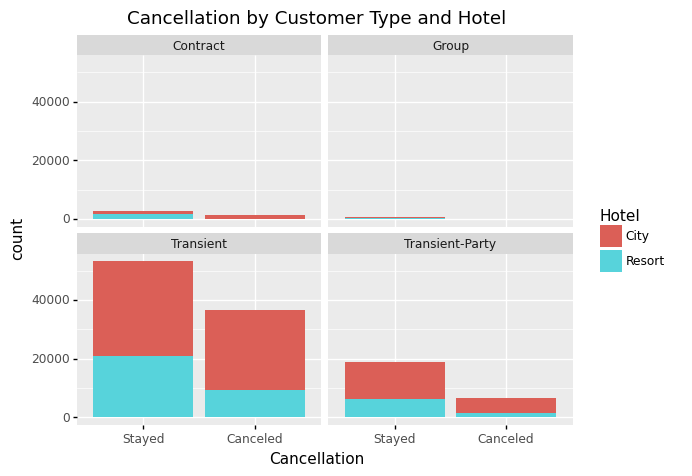

<ggplot: (167153933078)>

In [22]:
#exploration graph 1
from plotnine import *
ggplot(data = df, mapping = aes(x = 'is_canceled', fill = 'hotel')) + geom_bar() + \
facet_wrap('customer_type') + labs(title = "Cancellation by Customer Type and Hotel") + \
scale_x_discrete(name = "Cancellation", labels=("Stayed", "Canceled")) + \
scale_fill_discrete(name = "Hotel", labels = ("City", "Resort"))

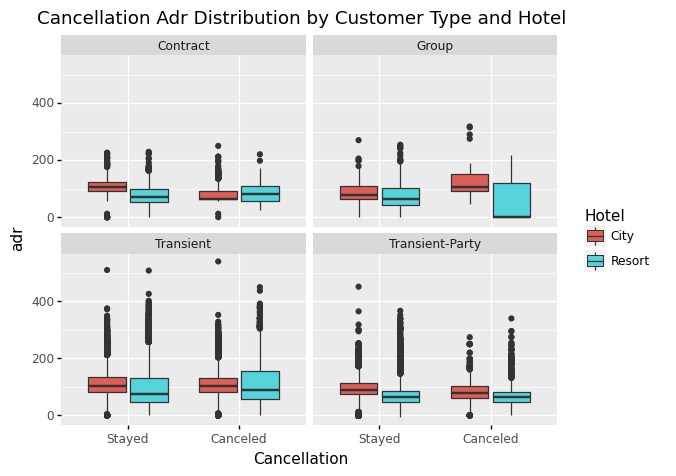

<ggplot: (167154257493)>

In [23]:
#exploration graph 2
ggplot(data = df, mapping = aes(x = 'is_canceled', y = 'adr', fill = 'hotel')) + geom_boxplot() + \
facet_wrap('customer_type') + labs(title = "Cancellation Adr Distribution by Customer Type and Hotel") + \
scale_x_discrete(name = "Cancellation", labels=("Stayed", "Canceled")) + \
scale_fill_discrete(name = "Hotel", labels = ("City", "Resort"))

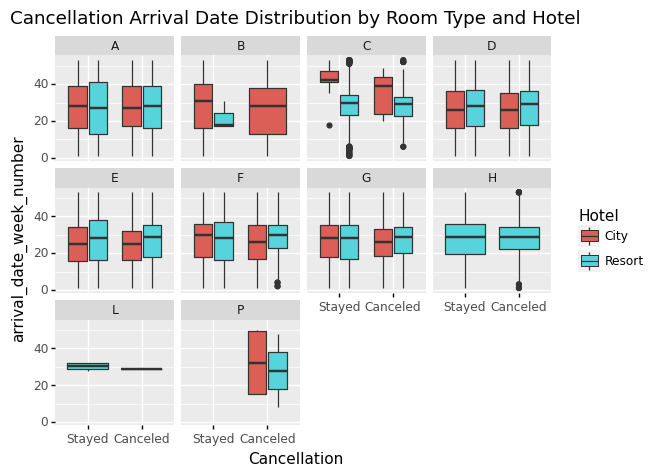

<ggplot: (167155329347)>

In [24]:
#exploration graph 3
ggplot(data = df, mapping = aes(x = 'is_canceled', y = 'arrival_date_week_number', fill = 'hotel')) + geom_boxplot() + \
facet_wrap('reserved_room_type') + labs(title = "Cancellation Arrival Date Distribution by Room Type and Hotel") + \
scale_x_discrete(name = "Cancellation", labels=("Stayed", "Canceled")) + \
scale_fill_discrete(name = "Hotel", labels = ("City", "Resort"))

#### Modeling

In [43]:
# train test split
from sklearn.model_selection import train_test_split
X = df.iloc[:, df.columns != 'is_canceled']
y = df.iloc[:, df.columns=='is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.25, random_state=1234)
print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (89542, 21)
test size: (29848, 21)


In [66]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', max_iter=10000)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

# make predictions
pred1 = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred1))

C:\Users\RaxyR\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

           0       0.77      0.95      0.85     18749
           1       0.87      0.52      0.65     11099

    accuracy                           0.79     29848
   macro avg       0.82      0.74      0.75     29848
weighted avg       0.81      0.79      0.78     29848



In [68]:
#naive bayes model
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

# make predictions
pred2 = clf.predict(X_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72     18749
           1       0.52      0.53      0.53     11099

    accuracy                           0.65     29848
   macro avg       0.62      0.62      0.62     29848
weighted avg       0.65      0.65      0.65     29848



C:\Users\RaxyR\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [69]:
#decision tree model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

# make predictions
pred3 = clf.predict(X_test)
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     18749
           1       0.75      0.76      0.76     11099

    accuracy                           0.82     29848
   macro avg       0.81      0.81      0.81     29848
weighted avg       0.82      0.82      0.82     29848



Logistic regression actually performed just slightly worse with Python than with R (accuracy .79 < .81). Naive bayes on the other hand performed much better with Python (.65 > .46). Finally, the decision tree performed slightly better with Python as well (.82 > .80). Ranking these three algorithms, we have decision tree, logistic regression, and naive bayes. This is very similar with the R project with the contention between the decision tree and logistic regression being with the margins of 1-2% accuracy. 

Some of the predictors may not have been independent so the naive assumption that they are may have limited the performance of the naives bayes model. This is most likely the reason it was outperformed by logistic regression and the decision tree. Logistic regression searches for a single linear decision boundary whereas the decision tree partitions the feature space into half spaces for a boundary but in this case the effect was more or less the same. However, because decision trees are so flexible, the model may have been prone to overfitting and logistic regression was less susceptible here. Maybe if any pruning was done, the accuracy could have increased. All in all, this was a battle of bias-variance tradeoff and logistic won, very slightly, and naive bayes struggled against the size of the data set.

Interestingly, naive bayes ran the fastest in Python and logistic regression the slowest, essentially the opposite of what occurred in R.

Personally, I lean towards machine learning in R rather than Python perhaps because I have had a longer history of experience with it but also because of ease of explanatory data analysis. There are a wide array of statistical functions and options with plotting and even though I was able to replicate ggplot2 in Python with the plotnine library, there are less nuances with R. I do enjoy the power of Python in that it can be used for almost anything being very flexible. R being very data analysis oriented makes it very useful for just focusing on that. So, to summarize, I believe data analysis and visualization is better done in R but more complicated modeling and deep learning should be done with Python. I think in the long run, I would use Python as it is more powerful and versatile but R will be a personal favorite with it's ease of use.